# Análisis de Componentes Principales

El objetivo es sustituir todas las columnas originales por unas nuevas variables que son combinaciones lineales de las originales. De manera que pasemos de una tabla con múltiples columnas (dimensiones) a una con un número pequeño de ellas, más manejables y que además no están linealmente relacionadas entre sí, lo cual es deseable para realizar una regresión lineal.

Una buena reducción de la dimensionalidad realizada a través de PCA garantiza, además, que se mantenga la mayor cantidad posible de información.

Normalmente, cada una de las componentes representa la información de un grupo de variables que originalmente estaban correlacionadas.

Matemáticamente, se calcula una matriz de varianzas-covarianzas, en la que en la diagonal principal tenemos las varianzas de cada columna original y en el resto de posiciones las covarianzas de las variables analizadas dos a dos.

$
\text{cov}(X, Y) = \frac{1}{n - 1} \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})
$

<img src="https://www.probabilidadyestadistica.net/wp-content/uploads/2022/01/matriz-de-covarianza-768x280.png?ezimgfmt=ng:webp/ngcb1" width="50%"/>


A partir de ella se calculan sus autovectores y autovalores. Los **autovectores** son direcciones en el espacio de características (nuejos ejes) hacia donde se proyectan los datos. Cada **autovector define un componente principal**, que es una combinación lineal de las variables originales. Los **autovalores** son escalas asociadas a cada autovector. Indican **cuánta varianza del conjunto de datos es capturada** por su correspondiente componente principal.



## Requisitos previos

Antes de comenzar el PCA es necesario analizar nuestro dataset para comprobar que es adecuado para el correcto desarrollo del proceso.

### Estandarización de las variables

Como en tantos otros procesos estadísticos es altamente recomendable normalizar nuestras variables de manera que tengan Media=1 y Desviación típica=0. Ya que el PCA es sensible a variables con escalas diferentes. Principalmente poque las covarianzas no están limitadas y pueden tomar valores muy altos, contrariamente a la correlación lineal de pearson, que está acotada a [-1, 1]

### Test de Barlett

Evalúa si la matriz de correlación es significativamente distinta de una matriz identidad. Una matriz identidad implica que las variables no están correlacionadas, por lo que PCA no sería útil.

Realizamos un test Chi cuadrado en el que las hipótesis son:
$H_0 : $ La matriz de correlación es la identidad (no hay correlación).

$H_1 : $ La matriz de correlación no es la identidad, por lo tanto hay correlación significativa entre variables. 

Si el pvalor es inferior a 0.05 rechazamos la hipótesis nula y consideramos que podemos continuar con el PCA

### Test de Kaiser-Meyer-Olkin (KMO)

Evalúa la proporción de varianza compartida entre variables comparada con la varianza total. Cuanto más alta, más adecuadas son las variables para una reducción por PCA o análisis factorial.

Cuando el resultado del Test KMO es superior a 0.6 consideramos el dataset adecuado para continuar


## Las 3 Reglas para la elección adecuada del número de Componentes

Cuántas componentes vamos a seleccionar en nuestra matriz final es importante, ya que por un lado queremos tener un dataset manejable y con el menor número de columnas posible. Sin embargo, queremos mantener la mayor varianza explicada posible. Por ello hay 3 reglas que nos van a ayudar en esta elección

### Autovalores > 1

Solo las componentes con autovalor superior a 1 serán significativas

### Regla del 90%

Se eligen tantos componentes como su varianza acumulada explique el 90% de la varianza original

### Método del codo

Se representarán en un gráfico de lineas las componentes, eje X, y la varianza explicada acumulada, eje Y. Visualmente cuando se vea un codo concluiremos que añadir más componentes no aporta un valor significativo. Por lo tanto podemos parar de adicionar componentes.


## Ejemplo Análisis componentes principales con Python

In [ ]:
# !pip install factor_analyzer

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# !pip install factor_analyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Cargar el dataset
data = load_breast_cancer()
X = data.data
y = data.target
features = data.feature_names

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Test de Bartlett
chi_square_value, p_value = calculate_bartlett_sphericity(X_scaled)
print("Test de Bartlett:")
print(f"Chi-cuadrado: {chi_square_value:.2f}, p-value: {p_value:.4e}")

# Test de KMO
kmo_all, kmo_model = calculate_kmo(X_scaled)
print("\nTest de KMO:")
print(f"KMO global: {kmo_model:.4f}")

Test de Bartlett:
Chi-cuadrado: 39362.12, p-value: 0.0000e+00

Test de KMO:
KMO global: 0.8322


C:\Users\bvazq\anaconda3\lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


### Multicolinealidad

Comprobamos que nuestras variables tienen una alta colinealidad

In [12]:
X_VIF = pd.DataFrame(X_scaled, columns = features)

vif_data = pd.DataFrame()
vif_data["variable"] = X_VIF.columns
vif_data["VIF"] = [variance_inflation_factor(X_VIF.values, i) for i in range(X_VIF.shape[1])]

vif_data

,variable,VIF
0,mean radius,3806.115296
1,mean texture,11.884048
2,mean perimeter,3786.400419
3,mean area,347.878657
4,mean smoothness,8.194282
5,mean compactness,50.505168
6,mean concavity,70.767720
7,mean concave points,60.041733
8,mean symmetry,4.220656
9,mean fractal dimension,15.756977


Tanto el Test de Barlett como el Test KMO nos indican que podemos continuar con el PCA

In [23]:
# Aplicar PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Varianza explicada (autovalores normalizados)
explained_variance_ratio = pca.explained_variance_ratio_

# Componentes principales (autovectores)
components = pca.components_

explained_variance = pca.explained_variance_
print("Según la regla de autovalores > 1 deberemos retener: ", len(explained_variance[explained_variance > 1]), " componentes")

Según la regla de autovalores > 1 deberemos retener:  6  componentes


Según el criterio de la varianza acumulada explicada deberíamos retener 7, ya que es el primero que supera el 90%, sin embargo con 6 explicamos el 88%, bastante cercano.

In [25]:
# Mostrar autovalores
sum_autoval_list = []
print("Autovalores (varianza explicada por cada componente):")
for i, var in enumerate(explained_variance_ratio):
    sum_autoval_list.append(var)
    sum_autoval = sum(sum_autoval_list)
    print(f"PC{i+1}: {var*100:.4f}; 'acumulado': {sum_autoval*100:.4f}")

Autovalores (varianza explicada por cada componente):
PC1: 44.2720; 'acumulado': 44.2720
PC2: 18.9712; 'acumulado': 63.2432
PC3: 9.3932; 'acumulado': 72.6364
PC4: 6.6021; 'acumulado': 79.2385
PC5: 5.4958; 'acumulado': 84.7343
PC6: 4.0245; 'acumulado': 88.7588
PC7: 2.2507; 'acumulado': 91.0095
PC8: 1.5887; 'acumulado': 92.5983
PC9: 1.3896; 'acumulado': 93.9879
PC10: 1.1690; 'acumulado': 95.1569
PC11: 0.9797; 'acumulado': 96.1366
PC12: 0.8705; 'acumulado': 97.0071
PC13: 0.8045; 'acumulado': 97.8117
PC14: 0.5234; 'acumulado': 98.3350
PC15: 0.3138; 'acumulado': 98.6488
PC16: 0.2662; 'acumulado': 98.9150
PC17: 0.1980; 'acumulado': 99.1130
PC18: 0.1754; 'acumulado': 99.2884
PC19: 0.1649; 'acumulado': 99.4533
PC20: 0.1039; 'acumulado': 99.5572
PC21: 0.0999; 'acumulado': 99.6571
PC22: 0.0915; 'acumulado': 99.7486
PC23: 0.0811; 'acumulado': 99.8297
PC24: 0.0602; 'acumulado': 99.8899
PC25: 0.0516; 'acumulado': 99.9415
PC26: 0.0273; 'acumulado': 99.9688
PC27: 0.0230; 'acumulado': 99.9918
PC28: 0.

Analizando el gráfico de a continuación vemos que a partir de la sexta componente el incremento no es significativo

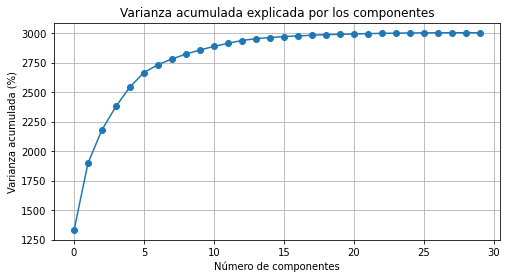

In [27]:
# Gráfico de varianza explicada (autovalores)
plt.figure(figsize=(8,4))
plt.plot(np.cumsum(explained_variance)*100, marker='o')
plt.title('Varianza acumulada explicada por los componentes')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada (%)')
plt.grid(True)
plt.show()

A continuación vemos cómo solo con las dos primeras componentes se podría resolver casi lienealmente el problema de la clasificación de breast-cancer. Probablemente un SVC sería una buena elección.

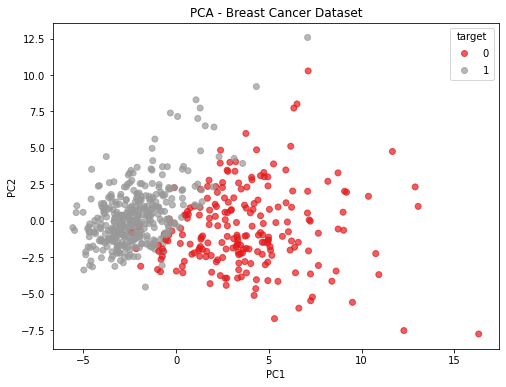

In [32]:
# Visualización en 2D
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='Set1', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA - Breast Cancer Dataset')
plt.legend(*scatter.legend_elements(), title="target")
plt.show()


## Definción final del nuevo conjunto de datos

Una vez determinado que el número de componentes deseado es 6, lanzamos de nuevo el análisis habiendo elegido ya solo nuestras 6 componentes

In [31]:
# PCA con 6 componentes
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X_scaled)

# Crear DataFrame con las 6 componentes
df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(6)])
df_pca['target'] = y  # Añadir la variable objetivo si se desea

df_pca.head()


,PC1,PC2,PC3,PC4,PC5,PC6,target
0,9.192837,1.948583,-1.123166,-3.633731,1.195110,1.411424,0
1,2.387802,-3.768172,-0.529293,-1.118264,-0.621775,0.028656,0
2,5.733896,-1.075174,-0.551748,-0.912083,0.177086,0.541452,0
3,7.122953,10.275589,-3.232790,-0.152547,2.960878,3.053422,0
4,3.935302,-1.948072,1.389767,-2.940639,-0.546747,-1.226495,0
